#  Série temporal em dados de tempo
 

In [ ]:
#Imports
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

Conjunto de dados de tempo são estacionários?

In [ ]:
df_temp = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv').rename(columns={'Date': 'Month', 'Births': 'Temperature'})
df_temp.head()

,Month,Temperature
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
# df_temp = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-mean-temp.csv')
# df_temp.head()

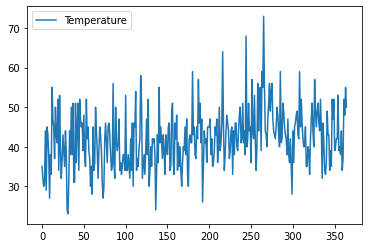

In [ ]:
df_temp.plot()

In [ ]:
rolmean = df_temp['Temperature'].rolling(window=6).mean()
rolstd = df_temp['Temperature'].rolling(window=6).std()

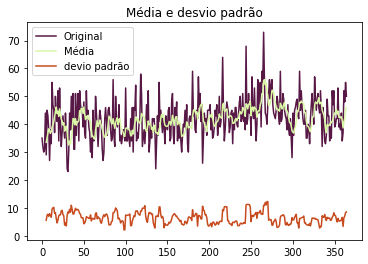

<Figure size 1152x1152 with 0 Axes>

In [ ]:

#Plot statistics:
plt.plot(df_temp['Temperature'], color= '#581845',label='Original')
plt.plot(rolmean, color='#DAF7A6', label='Média')
plt.plot(rolstd, color= '#c74b1e', label = 'devio padrão')
plt.legend(loc='best')
plt.title('Média e desvio padrão')
plt.figure(figsize=(16,16))
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller_test = adfuller(df_temp['Temperature'].values)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def describe_adfuller_test_result(result):
  return f"""test statistic: {result[0]} 
    pvalue: {round(result[1], 4)}
    usedlag: {result[2]}
    nobs: {result[3]}
    critical values: {result[4]}
    icbest: {result[5]} """
print(describe_adfuller_test_result(adfuller_test))

test statistic: -4.808291253559763 
    pvalue: 0.0001
    usedlag: 6
    nobs: 358
    critical values: {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}
    icbest: 2343.82909264642 


[ 1.          0.21724118  0.15287758  0.10821254  0.09066059  0.09595481
  0.09104012  0.19508071  0.14115295  0.06117859  0.04781522  0.04770662
 -0.01964707  0.02287422  0.08112657  0.11185686  0.07333732  0.01501845
  0.07270333  0.06859     0.09280107  0.26386846  0.14012147  0.06070286
  0.08716232  0.05038825  0.0650489   0.11466565  0.1552232   0.12850638
  0.10358981  0.09734643  0.04912286  0.04022798  0.05838555  0.05359812
  0.10151053  0.08268663  0.0912185   0.11192192  0.05652846]


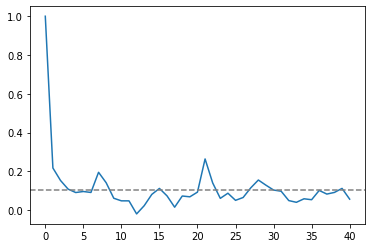

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
# Autocorrelation Function
lag_acf = acf(df_temp['Temperature'].values, fft=True)
print(lag_acf)
plt.plot(lag_acf)
plt.axhline(1.96/np.sqrt(len(df_temp['Temperature'].values)), linestyle = '--', color='gray')

[ 1.00000000e+00  2.17837995e-01  1.11560408e-01  5.85281386e-02
  4.59786015e-02  5.58720533e-02  4.70202856e-02  1.59717102e-01
  6.10433685e-02 -2.55127376e-02 -9.04877171e-03  6.47964202e-03
 -7.05821878e-02  5.05559721e-03  5.36221091e-02  6.87898847e-02
  2.41597101e-02 -3.05684079e-02  5.44254991e-02  5.45428316e-02
  6.74362575e-02  2.37393430e-01  1.52425267e-02 -5.96303432e-02
  3.53062529e-02 -2.20894553e-02 -9.35210339e-04  8.18797342e-02
  5.42645544e-02  6.15269037e-03  4.44685601e-02  4.49200259e-02
 -1.26461361e-02  2.68953225e-02  1.81980871e-02 -4.23238915e-02
  2.48536163e-02  1.66890343e-02  5.67408994e-02  7.45154149e-02
 -3.73655225e-03]


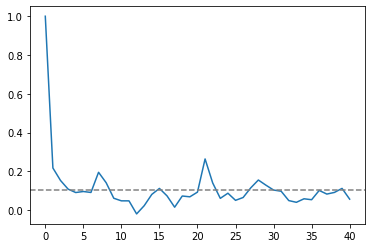

In [ ]:

# Partial Autocorrelation Function
lag_pacf = pacf(df_temp['Temperature'].values)
print(lag_pacf)
plt.plot(lag_acf)
plt.axhline(1.96/np.sqrt(len(df_temp['Temperature'].values)), linestyle = '--', color='gray')

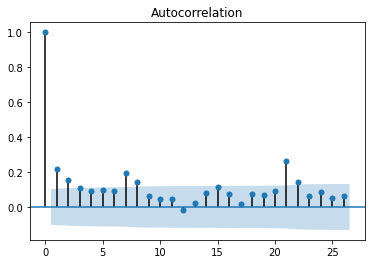

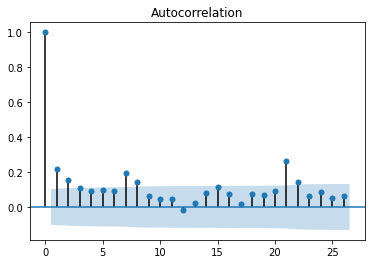

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_temp['Temperature'])

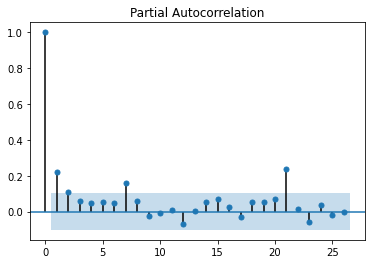

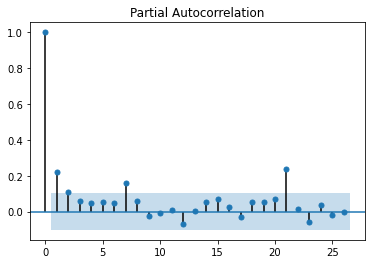

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_temp['Temperature'])